In [1]:
import pandas as pd
import psycopg2

**Formatear el fichero de titulos**

In [13]:
file = "./archive/title.akas.tsv/data.tsv"
file2 = "./archive/title.akas.tsv/data2.tsv"

with open(file, 'r',encoding="UTF-8") as dat:
    
    with open (file2, "w", encoding="UTF-8") as dat2:
        
        #Cabecera
        header = dat.readline()
        dat2.write(header)
        
        for i in range(30000000):
            line = dat.readline()
            
            #Quito el \n del final y divido por tab
            line_split = line.replace("\n","").split("\t")
            
            try:
                #Mer quedo solo con los titulos originales
                if line_split[7]=="1":
                    dat2.write(line)
            except:
                print("Problema en linea : ",i)
                break

Problema en linea :  25431179


**Formateo fichero Basics**

In [ ]:
file = "./archive/title.basics.tsv/data.tsv"
file2 = "./archive/title.basics.tsv/data2.tsv"

In [24]:
num_lines = sum(1 for line in open(file, encoding="UTF-8"))
print(num_lines)

In [28]:
with open(file, 'r',encoding="UTF-8") as dat:
    
    with open (file2, "w", encoding=bb"UTF-8") as dat2:
        
        #Cabecera
        header = dat.readline()
        new_header = header.replace("tconst","titleid")
        dat2.write(new_header)
        
        for i in range(650000):
            line = dat.readline()
           
            #Quito el \n del final y divido por tab
            new_line = line.replace("\\N","")
            
            dat2.write(new_line)

**Formatear fichero CREW**

In [45]:
file = "./archive/title.crew.tsv/data.tsv"
file2 = "./archive/title.crew.tsv/data2.tsv"

In [46]:
num_lines = sum(1 for line in open(file, encoding="UTF-8"))
print(num_lines)

7681049


In [86]:
with open(file, 'r',encoding="UTF-8") as dat:
    
    with open (file2, "w", encoding="UTF-8") as dat2:
        
        #Cabecera
        header = dat.readline()
        new_header = "titleid"+"\t"+"crewid"+"\t"+"typeid"+"\n"
        dat2.write(new_header)
        
        for i in range(7681049):
            line = dat.readline()
            
            #Quito el \N y la \n del final
            line = line.replace("\\N","").replace("\n", "")
            
            line_split = line.split("\t") 
            
            # Obtengo los directores y los guionistas
            directors = line_split[1].split(",")
            writers = line_split[2].split(",")
            
            # Pivoto los directores --> tipo 0
            for d in directors:
                if d!="":
                    new_line = line_split[0]+"\t"+d+"\t"+"0"+"\n"
                    dat2.write(new_line)
            
            # Pivoto los guionistas --> tipo 1
            for w in writers:
                if w!="":
                    new_line = line_split[0]+"\t"+w+"\t"+"1"+"\n"
                    dat2.write(new_line)
            
            

IndexError: list index out of range

**Conectar a la BD para explorar los datos cargados**

In [2]:
conn = psycopg2.connect(
    host="localhost",
    database="imdb",
    user="postgres",
    password="postgres")

In [29]:
query = '''
select 
    t.titleid,
    t.title,
    r.average_rating,
    r.num_votes,
    b.startyear,
    b.runtimeminutes,
    b.genres
from title t
    inner join rating r on r.titleid = t.titleid
    inner join basics b on b.titleid = t.titleid
where b.titletype like 'movie%'
order by r.num_votes desc, r.average_rating desc
'''

In [30]:
df = pd.read_sql_query(query,con=conn)

array([[<AxesSubplot:title={'center':'average_rating'}>,
        <AxesSubplot:title={'center':'num_votes'}>],
       [<AxesSubplot:title={'center':'startyear'}>,
        <AxesSubplot:title={'center':'runtimeminutes'}>]], dtype=object)

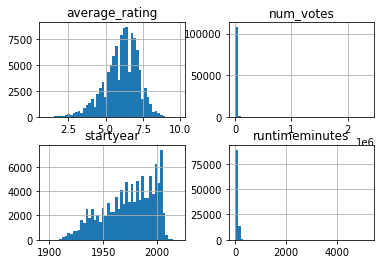

In [31]:
df.hist(bins=50)

In [32]:
df.describe()

,average_rating,num_votes,startyear,runtimeminutes
count,110131.00000,1.101310e+05,110129.000000,103034.000000
mean,6.07118,4.471339e+03,1973.969091,94.301269
std,1.13891,3.917350e+04,23.342969,30.657807
min,1.00000,5.000000e+00,1897.000000,6.000000
25%,5.40000,2.200000e+01,1957.000000,83.000000
50%,6.20000,8.200000e+01,1977.000000,92.000000
75%,6.90000,4.240000e+02,1994.000000,102.000000
max,9.90000,2.358150e+06,2020.000000,5220.000000


In [39]:
df.sort_values(by="runtimeminutes", ascending=False).head(10)

,titleid,title,average_rating,num_votes,startyear,runtimeminutes,genres
30305,tt0284020,The Cure for Insomnia ...,5.2,347,1987.0,5220.0,"Documentary,Music ..."
41296,tt0342707,The Longest Most Meaningless Movie in the Worl...,5.6,172,1970.0,2880.0,"Documentary,Drama,History ..."
57060,tt0179184,**** ...,6.3,74,1967.0,1500.0,Drama ...
53118,tt0095979,Resan ...,7.4,90,1987.0,873.0,"Documentary,War ..."
16295,tt0246135,"Out 1, noli me tangere ...",7.8,1190,1971.0,776.0,"Drama,Mystery ..."
55110,tt0074334,Comment Yukong déplaça les montagnes ...,8.0,81,1976.0,763.0,Documentary ...
65376,tt0106772,Hong lou meng ...,7.6,49,1988.0,735.0,Drama ...
85743,tt0174864,Leningradskaya retrospektiva (1957-1990) ...,7.4,18,1990.0,659.0,"Documentary,History ..."
42771,tt0270784,Khleb - imya sushchestvitelnoe ...,5.8,158,1988.0,580.0,"Drama,History,Romance ..."
5531,tt0090015,Shoah ...,8.7,8566,1985.0,566.0,"Documentary,History,War ..."


<AxesSubplot:>

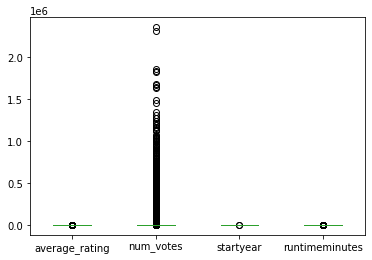

In [33]:
df.plot.box()

**More voted titles**

In [40]:
df_more_voted =df[df.num_votes>1000]

17902


array([[<AxesSubplot:title={'center':'average_rating'}>,
        <AxesSubplot:title={'center':'num_votes'}>],
       [<AxesSubplot:title={'center':'startyear'}>,
        <AxesSubplot:title={'center':'runtimeminutes'}>]], dtype=object)

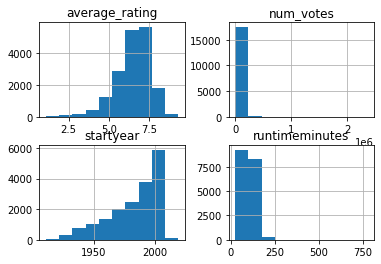

In [41]:
print(len(df_more_voted))
df_more_voted.hist()

In [42]:
df_more_voted.corr()

,average_rating,num_votes,startyear,runtimeminutes
average_rating,1.000000,0.193632,-0.232362,0.249041
num_votes,0.193632,1.000000,0.137310,0.147677
startyear,-0.232362,0.137310,1.000000,0.124899
runtimeminutes,0.249041,0.147677,0.124899,1.000000


In [43]:
df_more_voted.sort_values(by="num_votes", ascending=False).head(10)

,titleid,title,average_rating,num_votes,startyear,runtimeminutes,genres
0,tt0111161,The Shawshank Redemption ...,9.3,2358150,1994.0,142.0,Drama ...
1,tt0468569,The Dark Knight ...,9.0,2317474,2008.0,152.0,"Action,Crime,Drama ..."
2,tt0137523,Fight Club ...,8.8,1866515,1999.0,139.0,Drama ...
3,tt0110912,Pulp Fiction ...,8.9,1837871,1994.0,154.0,"Crime,Drama ..."
4,tt0109830,Forrest Gump ...,8.8,1822435,1994.0,142.0,"Drama,Romance ..."
5,tt0133093,The Matrix ...,8.7,1687100,1999.0,136.0,"Action,Sci-Fi ..."
6,tt0120737,The Lord of the Rings: The Fellowship of the R...,8.8,1671405,2001.0,178.0,"Action,Adventure,Drama ..."
7,tt0167260,The Lord of the Rings: The Return of the King ...,8.9,1651952,2003.0,201.0,"Action,Adventure,Drama ..."
8,tt0068646,The Godfather ...,9.2,1631985,1972.0,175.0,"Crime,Drama ..."
9,tt0167261,The Lord of the Rings: The Two Towers ...,8.7,1493905,2002.0,179.0,"Action,Adventure,Drama ..."


In [44]:
df_more_voted.sort_values(by="average_rating", ascending=False).head(10)

,titleid,title,average_rating,num_votes,startyear,runtimeminutes,genres
0,tt0111161,The Shawshank Redemption ...,9.3,2358150,1994.0,142.0,Drama ...
2307,tt0252487,Hababam Sinifi ...,9.3,37585,1975.0,87.0,"Comedy,Drama ..."
8,tt0068646,The Godfather ...,9.2,1631985,1972.0,175.0,"Crime,Drama ..."
8336,tt0249795,Maya Bazaar ...,9.1,4130,1957.0,192.0,"Comedy,Drama,Family ..."
12232,tt0096403,Vreme na nasilie ...,9.0,2061,1988.0,288.0,Drama ...
8883,tt0353975,Sandesham ...,9.0,3672,1991.0,138.0,"Comedy,Drama ..."
3272,tt0253828,Tosun Pasa ...,9.0,21679,1976.0,90.0,"Comedy,History ..."
3249,tt0252488,Hababam Sinifi Sinifta Kaldi ...,9.0,21914,1976.0,91.0,Comedy ...
4105,tt0084302,Maratonci trce pocasni krug ...,9.0,14581,1982.0,92.0,"Comedy,Drama ..."
11589,tt0259534,Ramayana: The Legend of Prince Rama ...,9.0,2299,1992.0,170.0,"Action,Adventure,Animation ..."
